In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
%matplotlib inline

In [2]:
ibi_data = pd.read_csv('scripps1_ibi.csv',sep=';')

FileNotFoundError: [Errno 2] File b'scripps1_ibi.csv' does not exist: b'scripps1_ibi.csv'

In [3]:
# issues with calculating it out with IBI: some IBI's have incorrect UTC time or are just not recorded. You also can't
# only use IBI's with valid validity because sometimes they are not recorded one after another 
def visualized_ibi_df_creator(df):
    valid_ibi = df.sort_values('UTC time')[ibi_data['Validity']==1]
    valid_ibi['UTC time'] = valid_ibi['UTC time'].astype(int)
    valid_ibi['UTC time (converted)'] = valid_ibi['UTC time'].apply(
        lambda x: datetime.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S"))
    hours = pd.to_datetime(valid_ibi['UTC time (converted)']).apply(lambda x: x.hour)
    def morning_afternoon_evening_night(x):
        if 5<=x<=11: # 7 hours 
            return 'morning'
        elif 12<=x<=16: # 5 hours
            return 'afternoon'
        elif 17<=x<=21: # 5 hours
            return 'evening'
        else: # 7 hours
            return 'night'
    valid_ibi['time frame'] = hours.apply(morning_afternoon_evening_night)
    valid_ibi['time according to UTC time'] = pd.to_datetime(valid_ibi['UTC time (converted)']).apply(
        lambda x: str(x.time()))
    return valid_ibi

In [4]:
valid_ibi = visualized_ibi_df_creator(ibi_data)
valid_ibi.head(10)

/Users/bernardwong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Date,Time,Validity,Padded IBI,IBI,UTC time,UTC time (converted),time frame,time according to UTC time
1,27.11.2018,12:37:43,1,980,980.0,1543351058,2018-11-27 12:37:38,afternoon,12:37:38
2,27.11.2018,12:37:43,1,956,956.0,1543351059,2018-11-27 12:37:39,afternoon,12:37:39
3,27.11.2018,12:37:43,1,1096,1096.0,1543351060,2018-11-27 12:37:40,afternoon,12:37:40
4,27.11.2018,12:37:43,1,1172,1172.0,1543351061,2018-11-27 12:37:41,afternoon,12:37:41
5,27.11.2018,12:37:43,1,1080,1080.0,1543351062,2018-11-27 12:37:42,afternoon,12:37:42
6,27.11.2018,12:37:50,1,1044,1044.0,1543351064,2018-11-27 12:37:44,afternoon,12:37:44
7,27.11.2018,12:37:50,1,1068,1068.0,1543351065,2018-11-27 12:37:45,afternoon,12:37:45
8,27.11.2018,12:37:50,1,1048,1048.0,1543351066,2018-11-27 12:37:46,afternoon,12:37:46
9,27.11.2018,12:37:50,1,996,996.0,1543351067,2018-11-27 12:37:47,afternoon,12:37:47
10,27.11.2018,12:37:50,1,984,984.0,1543351068,2018-11-27 12:37:48,afternoon,12:37:48


In [5]:
valid_ibi['time frame'].value_counts()

night        277764
morning      113597
afternoon     12002
evening        7292
Name: time frame, dtype: int64

In [6]:
def ibi_visualizer(valid_ibi, time = None, number = 300):
    dates = valid_ibi['Date'].unique()
    random_date = random.choice(dates)
    if time == None:
        random_time = random.choice(['morning','afternoon','evening','night'])
    else:
        random_time = time
    random_df = valid_ibi[(valid_ibi['Date'] == random_date) & (valid_ibi['time frame'] == random_time)]
    random_interest = random_df[:number]
    f = plt.figure(figsize=(20,10))
    ax = f.add_subplot(111)
    ax.plot(random_interest['time according to UTC time'],random_interest['Padded IBI'],'-o')
    ax.set_title('Lineplot of the first 100 Valid IBIs in the '+random_time+' of '+random_date);
    ax.set_xlabel('Epoch time');
    ax.set_xticklabels(labels = random_interest['time according to UTC time'], rotation = 90)
    ax.set_ylabel('IBI');

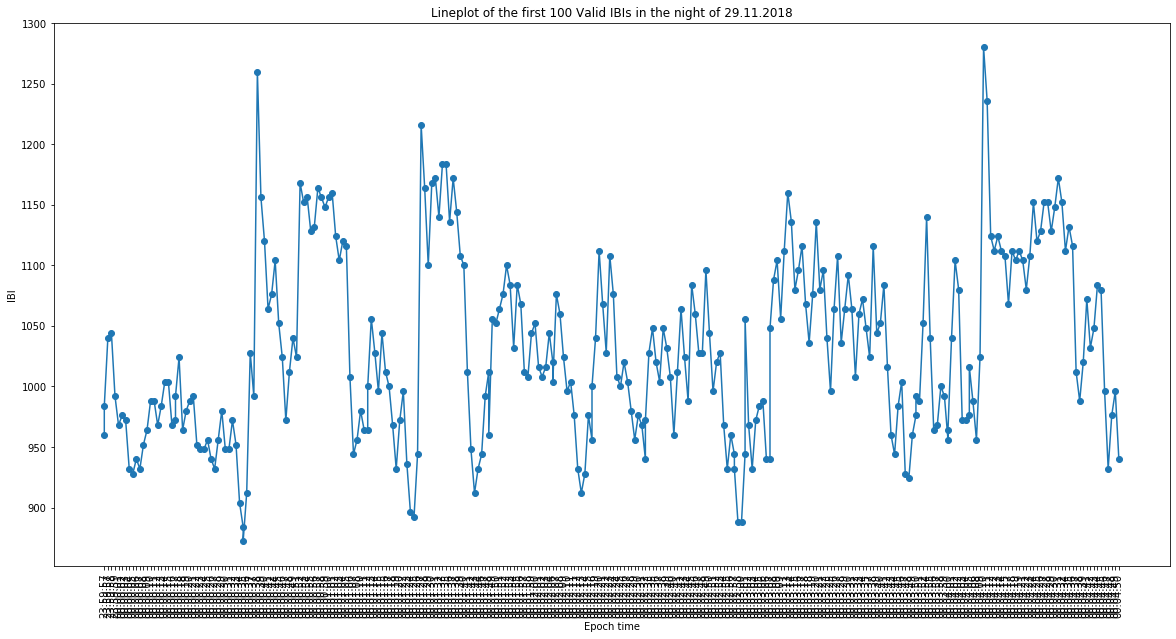

In [7]:
ibi_visualizer(valid_ibi,time = 'night')

In [8]:
# markov chain 

In [9]:
def markov_chain(df):
    def validity_func(x):
        if x!= 1:
            return False
        else:
            return True
    validity_counts = pd.DataFrame({'initial':df['Validity'].apply(validity_func)})
    validity_counts['next'] = validity_counts['initial'].shift(-1)
    validity_counts = validity_counts[:-1]
    
    counts = pd.DataFrame(validity_counts['initial'].value_counts()).reset_index()
    counts.columns = ['initial','total_count']
    
    result = pd.DataFrame(validity_counts.groupby('initial')['next'].value_counts())
    result.columns = ['count']
    result = result.reset_index()
    result = result.merge(counts)
    result['proportion'] = result['count']/result['total_count']
    return result.pivot(index='initial',columns = 'next',values = 'proportion')

In [10]:
markov_chain(ibi_data)

next,False,True
initial,,
False,0.758826,0.241174
True,0.046645,0.953355


In [11]:
# HRV STUFF

In [12]:
valid_ibi.head()

,Date,Time,Validity,Padded IBI,IBI,UTC time,UTC time (converted),time frame,time according to UTC time
1,27.11.2018,12:37:43,1,980,980.0,1543351058,2018-11-27 12:37:38,afternoon,12:37:38
2,27.11.2018,12:37:43,1,956,956.0,1543351059,2018-11-27 12:37:39,afternoon,12:37:39
3,27.11.2018,12:37:43,1,1096,1096.0,1543351060,2018-11-27 12:37:40,afternoon,12:37:40
4,27.11.2018,12:37:43,1,1172,1172.0,1543351061,2018-11-27 12:37:41,afternoon,12:37:41
5,27.11.2018,12:37:43,1,1080,1080.0,1543351062,2018-11-27 12:37:42,afternoon,12:37:42


In [13]:
pd.options.mode.chained_assignment = None
tester = valid_ibi[['IBI','UTC time']]
tester['next IBI'] = tester['IBI'].shift(-1)
tester = tester[:-1]
tester.head()

,IBI,UTC time,next IBI
1,980.0,1543351058,956.0
2,956.0,1543351059,1096.0
3,1096.0,1543351060,1172.0
4,1172.0,1543351061,1080.0
5,1080.0,1543351062,1044.0


In [14]:
len(tester)

410654

In [15]:
differences = np.abs(tester['next IBI']-tester['IBI'])
differences > 50 

1         False
2          True
3          True
4          True
5         False
6         False
7         False
8          True
9         False
10        False
11        False
12        False
13         True
14         True
15         True
16        False
17        False
18        False
19        False
20        False
21        False
22         True
23        False
24         True
25        False
26         True
27        False
28        False
29        False
30        False
          ...  
489839     True
489840     True
489853     True
489869     True
489877    False
489879     True
489880     True
489899     True
489901     True
489911     True
489912     True
489927     True
489930     True
489954     True
489971     True
489982     True
489998     True
490017     True
490023     True
490024    False
490026     True
490033     True
490038     True
490049     True
490053     True
490073    False
490075    False
490076    False
490078     True
490079    False
Length: 410654, dtype: b

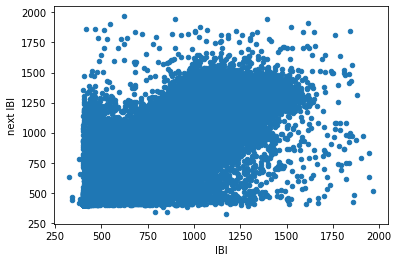

In [16]:
tester.plot(kind = 'scatter', x='IBI',y='next IBI')
# start of poincare plot, need the oval of best fit 

In [17]:
# rmssd
def rmssd(df):
    difference = df['IBI']-df['next IBI']
    difference_squared = difference**2
    mean_of_differences = np.mean(difference_squared)
    sqrt_item = np.sqrt(mean_of_differences)
    # np.sqrt(np.mean((tester['IBI']-tester['next IBI'])**2))
    return sqrt_item

In [18]:
rmssd(tester)

80.76343716275524

In [19]:
# sdnn (might be sdrr)
def sdnn(df):
    return np.std(df['IBI'])

In [20]:
sdnn(tester)

128.55608735040977

In [21]:
#nn50
def nn50(df):
    differences = np.abs(df['next IBI']-df['IBI'])
    return sum(differences > 50 )

In [22]:
nn50(tester)

152888

In [23]:
#pnn50
def pnn50(df):
    num = nn50(df)
    denom = len(df)+1
    return num/denom

In [24]:
pnn50(tester)

0.3723027845758605

In [3]:
# NEXT STEP STUFF

In [36]:
valid_ibi['Date'].unique()[0]

'27.11.2018'

In [48]:
example = valid_ibi[valid_ibi['Date'] == valid_ibi['Date'].unique()[0]]

In [56]:
example.head()

,Date,Time,Validity,Padded IBI,IBI,UTC time,UTC time (converted),time frame,time according to UTC time
1,27.11.2018,12:37:43,1,980,980.0,1543351058,2018-11-27 12:37:38,afternoon,12:37:38
2,27.11.2018,12:37:43,1,956,956.0,1543351059,2018-11-27 12:37:39,afternoon,12:37:39
3,27.11.2018,12:37:43,1,1096,1096.0,1543351060,2018-11-27 12:37:40,afternoon,12:37:40
4,27.11.2018,12:37:43,1,1172,1172.0,1543351061,2018-11-27 12:37:41,afternoon,12:37:41
5,27.11.2018,12:37:43,1,1080,1080.0,1543351062,2018-11-27 12:37:42,afternoon,12:37:42


In [53]:
example['Time'].iloc[0]

'12:37:43'

In [55]:
example['Time'].iloc[-1]

'23:59:56'

In [34]:
valid_ibi['Time'][:20]

1     12:37:43
2     12:37:43
3     12:37:43
4     12:37:43
5     12:37:43
6     12:37:50
7     12:37:50
8     12:37:50
9     12:37:50
10    12:37:50
11    12:37:50
12    12:37:56
13    12:37:56
14    12:37:56
15    12:37:56
16    12:37:56
17    12:37:56
18    12:38:02
19    12:38:02
20    12:38:02
Name: Time, dtype: object